In [2]:
import numpy as np
#import pyPLUTO as pp
from astropy.io import ascii
import os
import sys
from ipywidgets import interactive, widgets,fixed
from IPython.display import Audio, display
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation,FFMpegWriter
from matplotlib import rc,rcParams
from scipy.integrate import quad
rc('text', usetex=True)
rcParams['figure.figsize'] = (15., 6.0)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['text.latex.preamble'] = ['\\usepackage{siunitx}']
import seaborn
seaborn.despine()
seaborn.set_style('white', {'axes.linewidth': 0.5, 'axes.edgecolor':'black'})
seaborn.despine(left=True)
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%autoreload 1

In [4]:
%aimport f

In [5]:
def quadruple(d,VAR,tdk='Myrs',Save_Figure='',cl='',nn=0,mspeed='km',rows=2,cols=2,xlim=[None,None],
              ylim=[None,None],tlim=None,VARlim=[None,None],datafolder='../Document/DataImages/'):
    """
    Plot a rows(=2) x cols(=2) Variable 
    """
    X,Y=d['X'],d['Y']
    Vx=d['Vx'] if nn>0 else 0
    Vy=d['Vy'] if nn>0 else 0
    T=np.linspace(0,d['T'].shape[0]-1,rows*cols,dtype=int) if tlim==None else np.linspace(0,tlim,rows*cols,dtype=int)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True,
                            figsize=(cols*5,rows*5))
    i=0
    td=1e3 if tdk=='kyrs' else 1e6
    vmin=VARlim[0] if VARlim[0]==None else VAR.min()
    vmax=VARlim[1] if VARlim[1]==None else VAR.max()
    
    for ax in axes.flat:
        ext=[X.min(),X.max(),Y.min(),Y.max()]
        ax.get_yaxis().get_major_formatter().set_useOffset(False)
        #ax.add_artist(plt.Circle((0, 0), 1.0, color='r',fill=False,linestyle='--'))
        label = '{:.1f} {}'.format(d['T'][T[i]]/td,tdk)
        ax.set_title(label,fontsize=20)
        ax.grid(False)
        pc = ax.imshow(VAR[:,:,T[i]].T,cmap='viridis',origin='lower',aspect='equal',
                       extent=ext,vmin=vmin,vmax=vmax)
        if nn>0:
            k=nn #distance from boundaries for first/last arrows
            sc=2. if mspeed =='max' else 5. if mspeed == 'c' else 1e-4
            q=pc.axes.quiver(X[k:-k:nn],Y[k:-k:nn],
                            Vx[:,:,T[i]][k:-k:nn,k:-k:nn].T,
                            Vy[:,:,T[i]][k:-k:nn,k:-k:nn].T,
                             scale=sc,alpha=0.5,width=0.002)
            if mspeed == 'c':
                pc.axes.quiverkey(q,0.05,1.02,1.,r'$1\si{c}$',labelpos='E',fontproperties={'weight': 'bold'})
            elif mspeed == 'max':
                mV=np.max(np.sqrt(Vx[np.argmin((d['Y']-ylim[0])**2):np.argmin((d['Y']-ylim[1])**2),
                                     np.argmin((d['X']-xlim[0])**2):np.argmin((d['X']-xlim[1])**2),T[i]]**2+
                                  Vy[np.argmin((d['Y']-ylim[0])**2):np.argmin((d['Y']-ylim[1])**2),
                                     np.argmin((d['X']-xlim[0])**2):np.argmin((d['X']-xlim[1])**2),T[i]]**2))
                pc.axes.quiverkey(q,0.05,1.02,mV,'{:.2f} c'.format(mV),labelpos='E',
                                  fontproperties={'weight': 'bold'})
            else:
                pc.axes.quiverkey(q,0.02,1.02,3.36e-6,r'$1\si{km.s^{-1}}$',labelpos='E',fontproperties={'weight': 'bold'})
            
        i=i+1
    ax.set_xlim(xlim[0],xlim[1])
    ax.set_ylim(ylim[0],ylim[1])
    plt.tight_layout()
    cbar_ax = fig.add_axes([0., 1.015, 1., 0.025*(np.float(cols)/rows)])#*(np.float(cols)/rows)
    cb=fig.colorbar(pc, cax=cbar_ax,orientation="horizontal",label=cl)
    cb.ax.tick_params(labelsize=17)
    cb.ax.xaxis.offsetText.set(size=20)
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
    form='.png'
    if Save_Figure <> '': plt.savefig(datafolder+Save_Figure+form,bbox_inches='tight',format='png', dpi=100)



In [6]:
#JC=np.load('../Data/jet-3c.npz')
#aJC=np.load('../Data/afterJet.npz')
hJC=np.load('../Data/jet-3c-n.npz')
sJC=np.load('../Data/jet-sneq.npz')
nJC=np.load('../Data/jet-3c-nn.npz')
tJC=np.load('../Data/jet-3c-tab.npz')

# No Cooling Jet

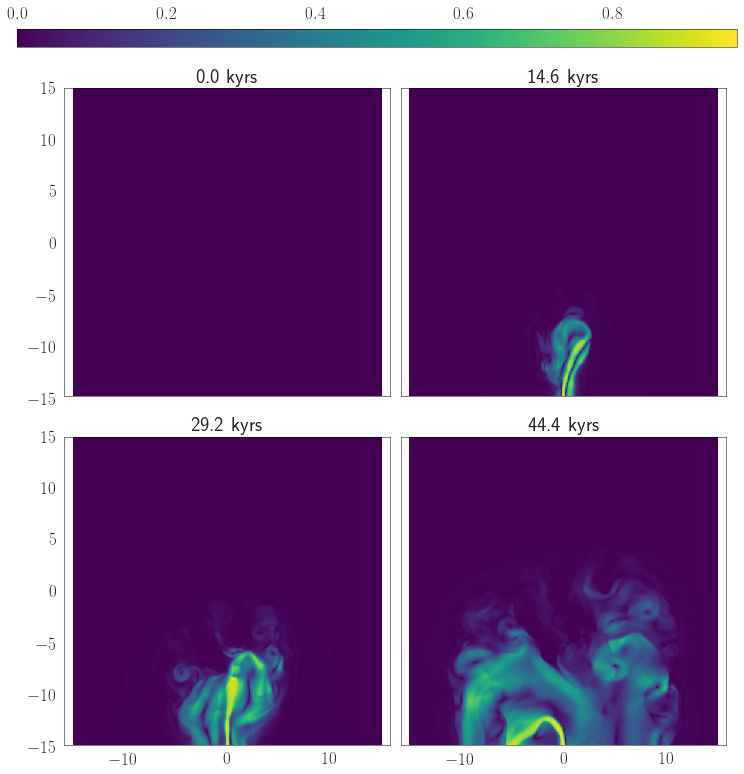

In [7]:
f.quadruple(nJC,np.sqrt(nJC['Vx']**2+nJC['Vy']**2),tdk='kyrs',tlim=70)

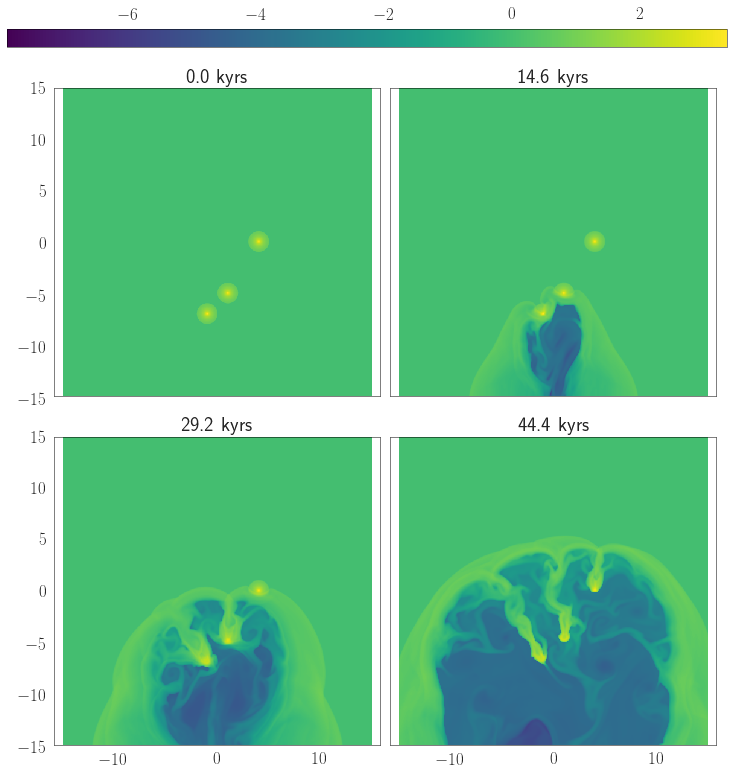

In [33]:
f.quadruple(nJC,np.log10(nJC['RHO']),tdk='kyrs',tlim=70)

# H2COOL jet

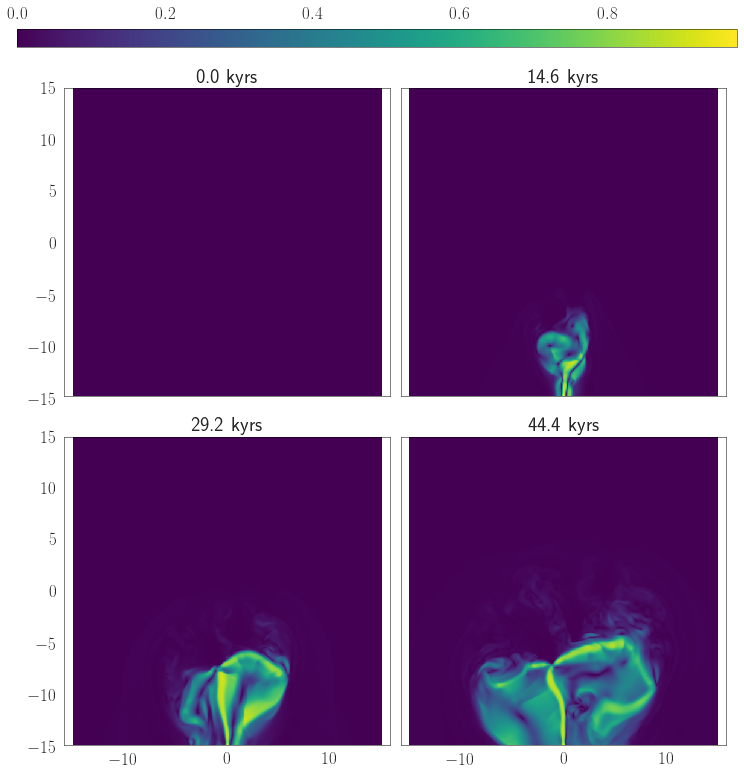

In [34]:
f.quadruple(hJC,np.sqrt(hJC['Vx']**2+hJC['Vy']**2),tdk='kyrs',tlim=70)

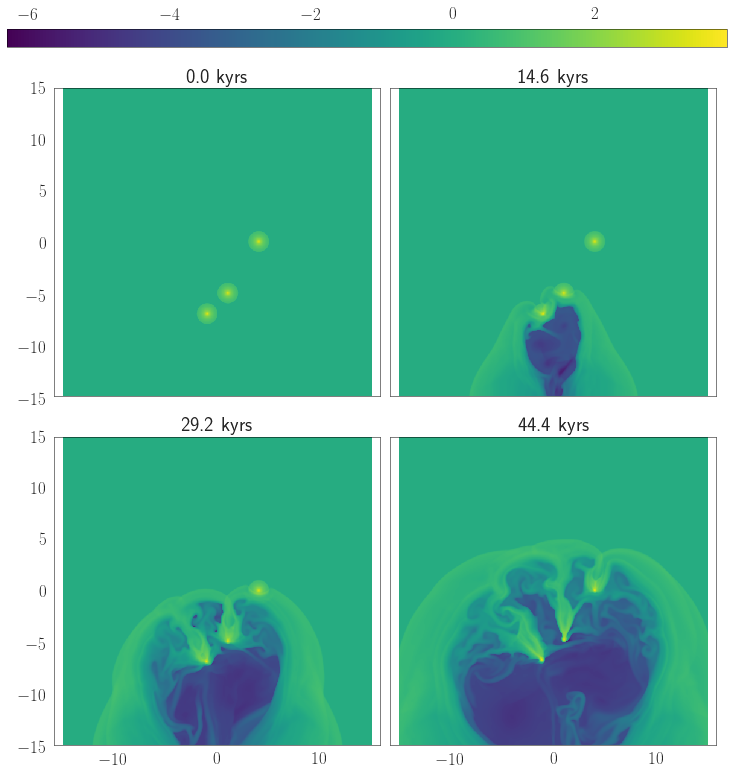

In [35]:
f.quadruple(hJC,np.log10(hJC['RHO']),tdk='kyrs',tlim=70)

# SNEq Jet

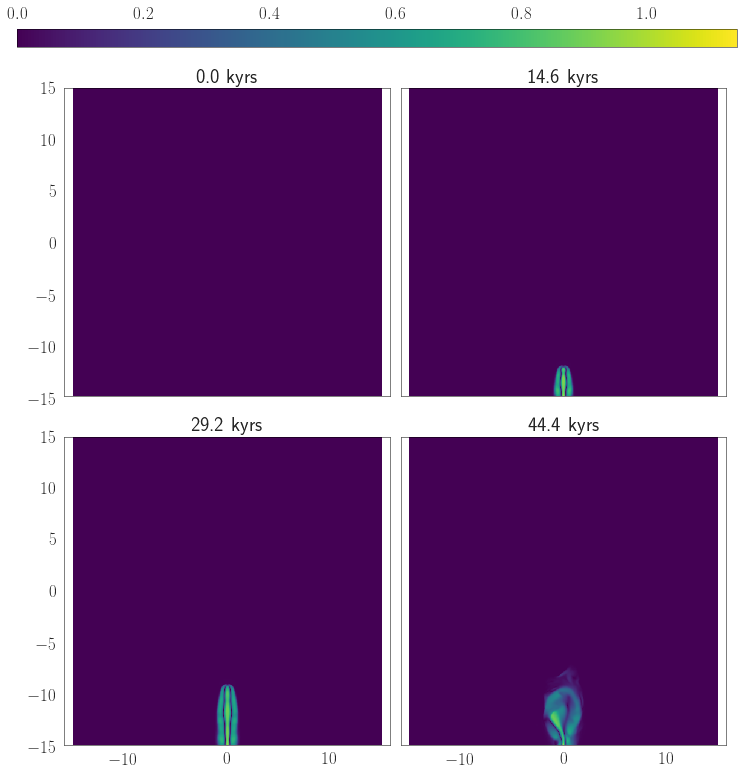

In [36]:
f.quadruple(sJC,np.sqrt(sJC['Vx']**2+sJC['Vy']**2),tdk='kyrs',tlim=70)

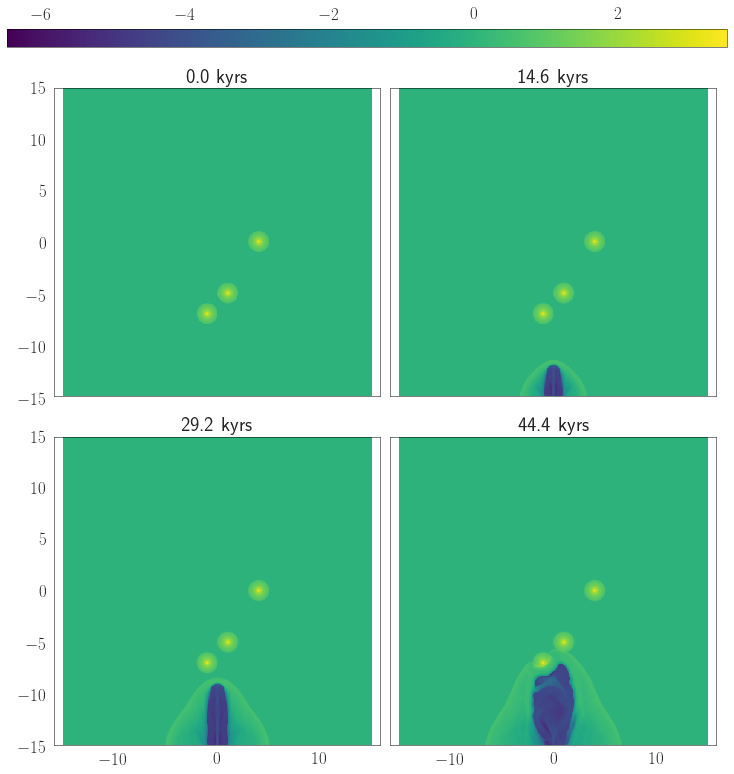

In [37]:
f.quadruple(sJC,np.log10(sJC['RHO']),tdk='kyrs',tlim=70)

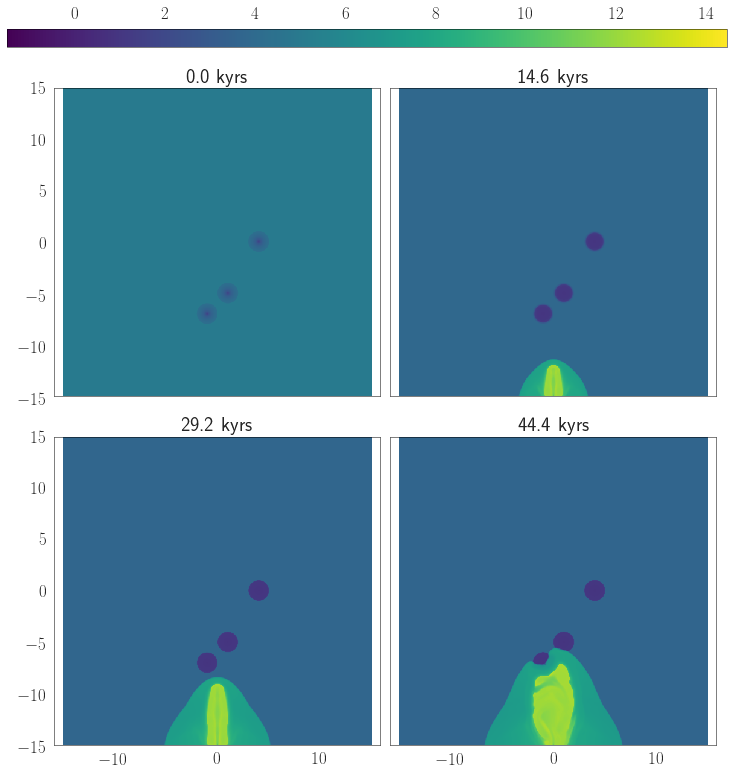

In [38]:
f.quadruple(sJC,np.log10(sJC['PRS']*f.Temp0/sJC['RHO']),tdk='kyrs',tlim=70)

# Tabulated Cooling

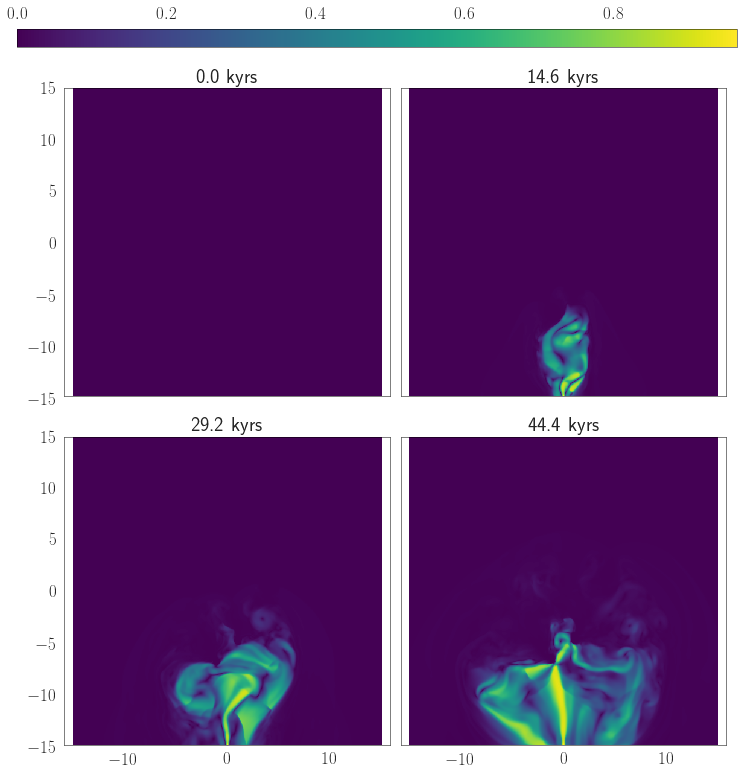

In [39]:
f.quadruple(tJC,np.sqrt(tJC['Vx']**2+tJC['Vy']**2),tdk='kyrs',tlim=70)

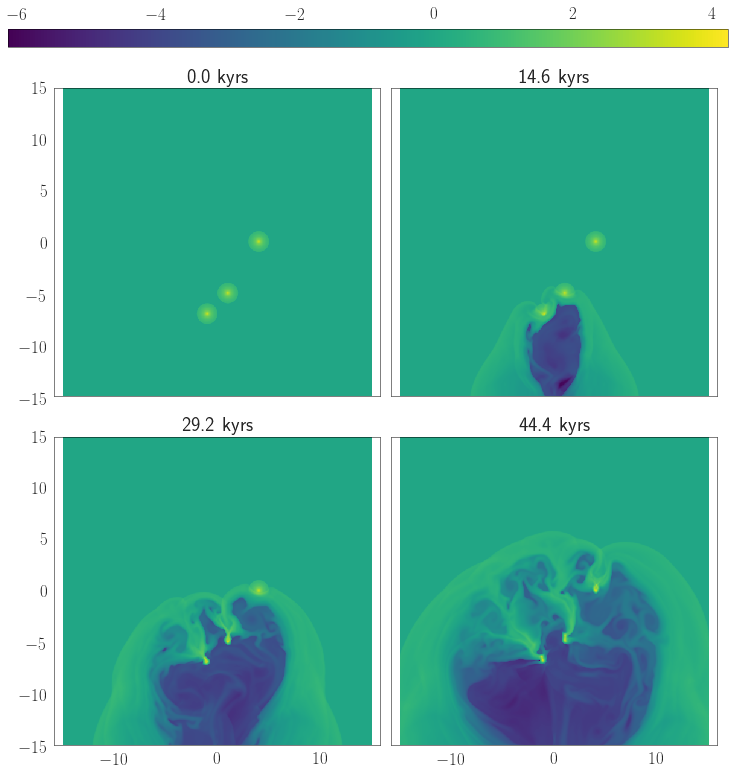

In [40]:
f.quadruple(tJC,np.log10(tJC['RHO']),tdk='kyrs',tlim=70)

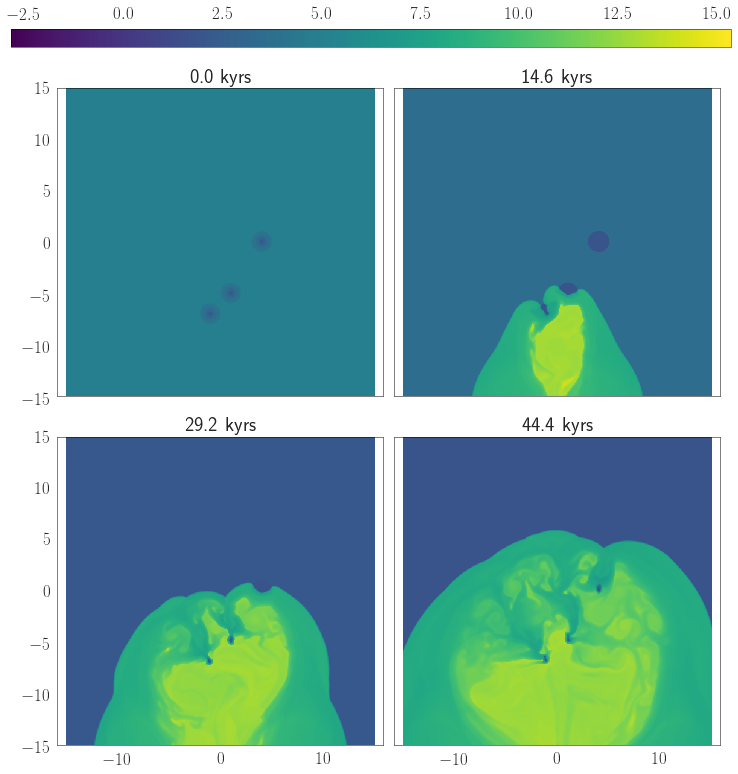

In [43]:
f.quadruple(tJC,np.log10(tJC['PRS']*f.Temp0/tJC['RHO']),tdk='kyrs',tlim=70)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


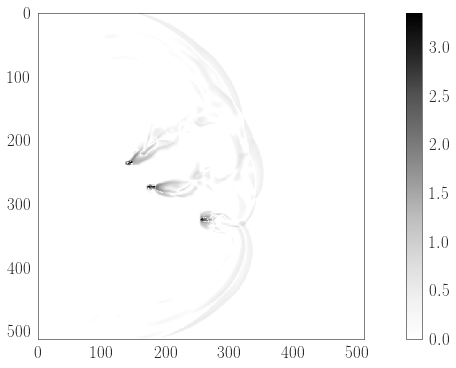

In [44]:
plt.imshow(np.log10(np.abs(tJC['RHO'][:,:,70]-hJC['RHO'][:,:,70])),vmin=0)
plt.colorbar()

In [ ]:
mm=max(JC['T'].shape[0],aJC['T'].shape[0])
TT=np.arange(mm)
times=JC['T'] if JC['T'].shape[0]>aJC['T'].shape[0] else aJC['T']

In [ ]:
def get_gas(RHO,aV,Temp,TT):
    #return np.array([RHO[:,:,t][np.logical_and(np.logical_and(aV[:,:,t]>6.7e-4,aV[:,:,t]<2.3e-3),Temp[:,:,t]<1e7)].sum()/RHO[:,:,t].sum() for t in TT])
    return np.array([RHO[:,:,t][aV[:,:,t]>6.7e-4].sum()/RHO[:,:,t].sum() for t in TT])

In [ ]:
%%time
Mfj=get_gas(JC['RHO'],np.sqrt(JC['Vx']**2+JC['Vy']**2),JC['PRS']*f.Temp0/JC['RHO'],np.arange(JC['T'].shape[0]))
Mfaj=get_gas(aJC['RHO'],np.sqrt(aJC['Vx']**2+aJC['Vy']**2),aJC['PRS']*f.Temp0/aJC['RHO'],np.arange(aJC['T'].shape[0]))

In [ ]:
p=85
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Mfj)
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,Mfaj[1:mm-p])

In [ ]:
Temp=JC['PRS']*f.Temp0/JC['RHO']
Tempm=np.ma.masked_where(JC['RHO']<10,Temp)
plt.imshow(Tempm[:,:,-1].T,cmap='viridis',origin='lower')
#plt.contour(np.log10(JC['RHO'][:,:,-1]).T,origin='lower',levels=[1.,2.,3.])
plt.colorbar()

In [ ]:
aTemp=aJC['PRS']*f.Temp0/aJC['RHO']
aTempm=np.ma.masked_where(aJC['RHO']<10,aTemp)
plt.imshow(aTempm[:,:,-1].T,cmap='viridis',origin='lower')
#plt.contour(np.log10(JC['RHO'][:,:,-1]).T,origin='lower',levels=[1.,2.,3.])
plt.colorbar()

In [ ]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Tempm.mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,aTempm.mean(axis=(0,1))[1:mm-p])

In [ ]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,Temp.mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,aTemp.mean(axis=(0,1))[1:mm-p])
plt.yscale('log')

In [ ]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,(np.sqrt(JC['Vx']**2+JC['Vy']**2)).mean(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,(np.sqrt(aJC['Vx']**2+aJC['Vy']**2)).mean(axis=(0,1))[1:mm-p])

In [ ]:
plt.plot(times[TT][0:min(mm,Mfj.shape[0])]/1e3,(np.sqrt(JC['Vx']**2+JC['Vy']**2)).std(axis=(0,1)))
plt.plot(times[TT][p+1:min(mm,Mfaj.shape[0]+p)]/1e3,(np.sqrt(aJC['Vx']**2+aJC['Vy']**2)).std(axis=(0,1))[1:mm-p])
#plt.yscale('log')

CPU times: user 1min 44s, sys: 1min 42s, total: 3min 27s
Wall time: 2min 30s


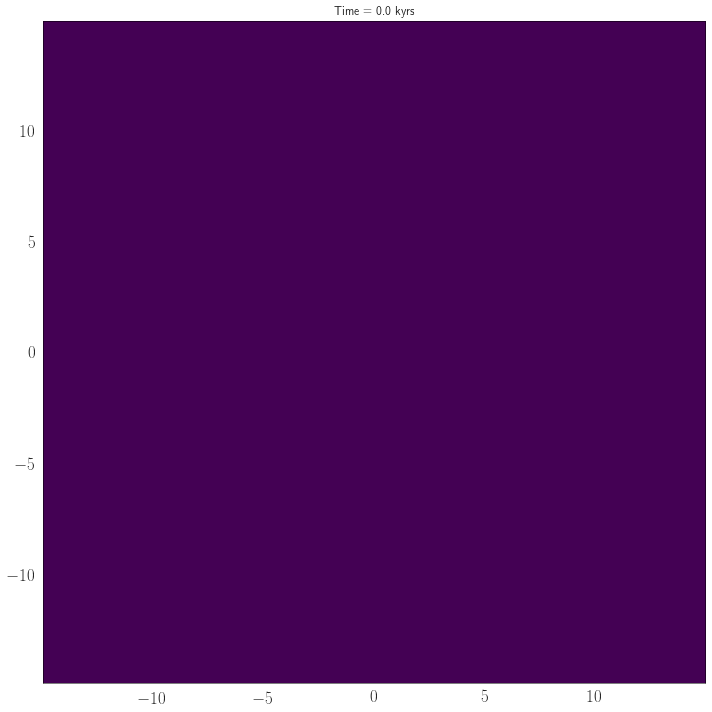

In [46]:
%%time
FF=tJC
vfile='TabulatedV'#'test'
step=1

VAR=np.sqrt(FF['Vx']**2+FF['Vy']**2)####
#VAR=np.log10(FF['RHO'])
T = FF['T'][::step]
fig=plt.figure(figsize=(10,10))
fig.set_tight_layout(True)
ax1=plt.subplot()
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
ext=[FF['X'].min(),FF['X'].max(),FF['Y'].min(),FF['Y'].max()]

pc = ax1.imshow(VAR[:,:,0].T,cmap='viridis',origin='lower',aspect='equal',extent=ext,
                            vmin=VAR.min(axis=2).min(),vmax=VAR.max(axis=2).max())
def update(i):
    ax1.cla()
    pc = ax1.imshow(VAR[:,:,i].T,cmap='viridis',origin='lower',aspect='equal',extent=ext,
                    vmin=VAR.min(axis=2).min(),vmax=VAR.max(axis=2).max())
    label = 'Time = {0:.1f} kyrs'.format(T[i]/1000.)
    ax1.set_title(label)
    return ax1
anim = FuncAnimation(fig, update, frames=range(T.shape[0]), interval=150)
anim.save(vfile+'.gif',writer='imagemagic')